# 1.0 Import Data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings

In [2]:
data = pd.read_csv('dataset.csv')

print(data)

     No.        Author  Rating  \
0      1       n*****n       3   
1      2       y*****i       2   
2      3  amalinadinee       2   
3      4       c*****8       5   
4      5    8kbvdmoyw9       5   
..   ...           ...     ...   
445  446   random_name       2   
446  447   random_name       2   
447  448   random_name       2   
448  449   random_name       2   
449  450   random_name       2   

                                                Review  
0    baju kurta sampai dalam keadaan baik, tapi tak...  
1    Sizing tak accurate langsung, aku rasa macam b...  
2    Baju kurta aku dah koyak sebelum pakai, memang...  
3    Delivery laju. Kain cantik. Thanks seller. Mas...  
4    Baju selamat mendarat kain cantik dan sedap di...  
..                                                 ...  
445  baju Melayu ni ^#@%! sangat loose. Tak matchin...  
446  Baju senget. Ukuran tak sama  Poslaju lambat h...  
447  Baju Melayu yang aku beli ni, ada "hole" kecil...  
448  Baju Melayu yang

In [3]:
data.head()

,No.,Author,Rating,Review
0,1,n*****n,3,"baju kurta sampai dalam keadaan baik, tapi tak..."
1,2,y*****i,2,"Sizing tak accurate langsung, aku rasa macam b..."
2,3,amalinadinee,2,"Baju kurta aku dah koyak sebelum pakai, memang..."
3,4,c*****8,5,Delivery laju. Kain cantik. Thanks seller. Mas...
4,5,8kbvdmoyw9,5,Baju selamat mendarat kain cantik dan sedap di...


In [4]:
#!pip install wordcloud

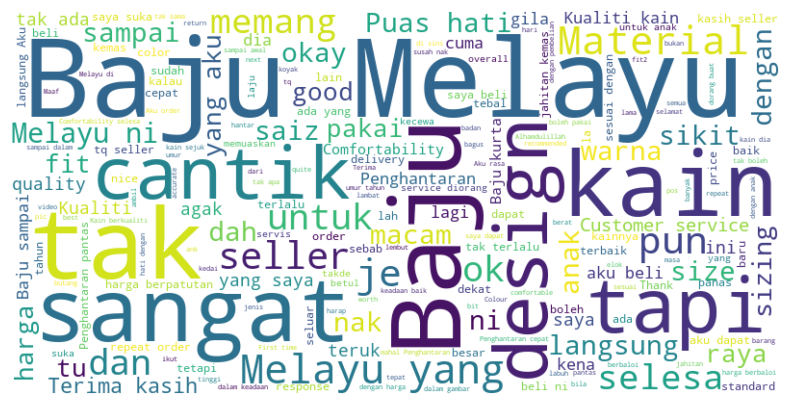

In [5]:
import pandas as pd
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

# Assuming you've already loaded the dataset
data = pd.read_csv('dataset.csv')

# Concatenate all reviews into a single string
reviews_text = ' '.join(data['Review'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(reviews_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# 2.0 Data Preprocessing

### 2.1 Data Cleaning and Formatting

In [6]:
data.isnull().any()

No.       False
Author    False
Rating    False
Review    False
dtype: bool

In [7]:
# Create a new DataFrame with only the desired columns
selected_columns = ['Rating', 'Review']
data = data[selected_columns]

# Display the new DataFrame
print(data)

     Rating                                             Review
0         3  baju kurta sampai dalam keadaan baik, tapi tak...
1         2  Sizing tak accurate langsung, aku rasa macam b...
2         2  Baju kurta aku dah koyak sebelum pakai, memang...
3         5  Delivery laju. Kain cantik. Thanks seller. Mas...
4         5  Baju selamat mendarat kain cantik dan sedap di...
..      ...                                                ...
445       2  baju Melayu ni ^#@%! sangat loose. Tak matchin...
446       2  Baju senget. Ukuran tak sama  Poslaju lambat h...
447       2  Baju Melayu yang aku beli ni, ada "hole" kecil...
448       2  Baju Melayu yang aku beli ni ada stain & hole....
449       2  Customer service dorang "tidak beretika". Aku ...

[450 rows x 2 columns]


In [8]:
# case folding and lowercasing
def casefolding(Review):
    Review = Review.lower()
    return Review
data['LowerCaseReview'] = data['Review'].apply(casefolding)
data.head()

,Rating,Review,LowerCaseReview
0,3,"baju kurta sampai dalam keadaan baik, tapi tak...","baju kurta sampai dalam keadaan baik, tapi tak..."
1,2,"Sizing tak accurate langsung, aku rasa macam b...","sizing tak accurate langsung, aku rasa macam b..."
2,2,"Baju kurta aku dah koyak sebelum pakai, memang...","baju kurta aku dah koyak sebelum pakai, memang..."
3,5,Delivery laju. Kain cantik. Thanks seller. Mas...,delivery laju. kain cantik. thanks seller. mas...
4,5,Baju selamat mendarat kain cantik dan sedap di...,baju selamat mendarat kain cantik dan sedap di...


In [9]:
import string

# Define the set of punctuation characters
remove = set(string.punctuation)

# Function to remove punctuation
def remove_punctuation(text):
    return ' '.join(word.strip(''.join(remove)) for word in text.split())

# Apply the function to the 'Review_Lcase' column
data['RemovedPuncReview'] = data['LowerCaseReview'].apply(remove_punctuation)

# Display the updated DataFrame
data.head()

,Rating,Review,LowerCaseReview,RemovedPuncReview
0,3,"baju kurta sampai dalam keadaan baik, tapi tak...","baju kurta sampai dalam keadaan baik, tapi tak...",baju kurta sampai dalam keadaan baik tapi tak ...
1,2,"Sizing tak accurate langsung, aku rasa macam b...","sizing tak accurate langsung, aku rasa macam b...",sizing tak accurate langsung aku rasa macam ba...
2,2,"Baju kurta aku dah koyak sebelum pakai, memang...","baju kurta aku dah koyak sebelum pakai, memang...",baju kurta aku dah koyak sebelum pakai memang ...
3,5,Delivery laju. Kain cantik. Thanks seller. Mas...,delivery laju. kain cantik. thanks seller. mas...,delivery laju kain cantik thanks seller masih ...
4,5,Baju selamat mendarat kain cantik dan sedap di...,baju selamat mendarat kain cantik dan sedap di...,baju selamat mendarat kain cantik dan sedap di...


In [10]:
# Define a function to remove special characters
def remove_special_characters(text):
    # Using regular expression to keep only alphanumeric characters and spaces
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

# Apply the function to the 'Review_Lcase' column
data['RemovedSpecialCharReview'] = data['RemovedPuncReview'].apply(remove_special_characters)

# Display the first few rows
data.head()

,Rating,Review,LowerCaseReview,RemovedPuncReview,RemovedSpecialCharReview
0,3,"baju kurta sampai dalam keadaan baik, tapi tak...","baju kurta sampai dalam keadaan baik, tapi tak...",baju kurta sampai dalam keadaan baik tapi tak ...,baju kurta sampai dalam keadaan baik tapi tak ...
1,2,"Sizing tak accurate langsung, aku rasa macam b...","sizing tak accurate langsung, aku rasa macam b...",sizing tak accurate langsung aku rasa macam ba...,sizing tak accurate langsung aku rasa macam ba...
2,2,"Baju kurta aku dah koyak sebelum pakai, memang...","baju kurta aku dah koyak sebelum pakai, memang...",baju kurta aku dah koyak sebelum pakai memang ...,baju kurta aku dah koyak sebelum pakai memang ...
3,5,Delivery laju. Kain cantik. Thanks seller. Mas...,delivery laju. kain cantik. thanks seller. mas...,delivery laju kain cantik thanks seller masih ...,delivery laju kain cantik thanks seller masih ...
4,5,Baju selamat mendarat kain cantik dan sedap di...,baju selamat mendarat kain cantik dan sedap di...,baju selamat mendarat kain cantik dan sedap di...,baju selamat mendarat kain cantik dan sedap di...


In [11]:
#!pip install demoji

In [12]:
import demoji

# Convert 'Review_Cleaned' column to strings
data['RemovedSpecialCharReview'] = data['RemovedSpecialCharReview'].astype(str)

# Remove emojis from the 'Review_Cleaned' column
data['DemojiReview'] = data['RemovedSpecialCharReview'].apply(lambda x: demoji.replace(x, ''))

# Display the updated DataFrame
data.head()


,Rating,Review,LowerCaseReview,RemovedPuncReview,RemovedSpecialCharReview,DemojiReview
0,3,"baju kurta sampai dalam keadaan baik, tapi tak...","baju kurta sampai dalam keadaan baik, tapi tak...",baju kurta sampai dalam keadaan baik tapi tak ...,baju kurta sampai dalam keadaan baik tapi tak ...,baju kurta sampai dalam keadaan baik tapi tak ...
1,2,"Sizing tak accurate langsung, aku rasa macam b...","sizing tak accurate langsung, aku rasa macam b...",sizing tak accurate langsung aku rasa macam ba...,sizing tak accurate langsung aku rasa macam ba...,sizing tak accurate langsung aku rasa macam ba...
2,2,"Baju kurta aku dah koyak sebelum pakai, memang...","baju kurta aku dah koyak sebelum pakai, memang...",baju kurta aku dah koyak sebelum pakai memang ...,baju kurta aku dah koyak sebelum pakai memang ...,baju kurta aku dah koyak sebelum pakai memang ...
3,5,Delivery laju. Kain cantik. Thanks seller. Mas...,delivery laju. kain cantik. thanks seller. mas...,delivery laju kain cantik thanks seller masih ...,delivery laju kain cantik thanks seller masih ...,delivery laju kain cantik thanks seller masih ...
4,5,Baju selamat mendarat kain cantik dan sedap di...,baju selamat mendarat kain cantik dan sedap di...,baju selamat mendarat kain cantik dan sedap di...,baju selamat mendarat kain cantik dan sedap di...,baju selamat mendarat kain cantik dan sedap di...


In [13]:
#!pip install contractions

In [14]:
import contractions

# Function to expand contractions
def expand_contractions(text):
    return contractions.fix(text)

# Apply the function to the 'Review_Lcase' column
data['ContractionReview'] = data['DemojiReview'].apply(expand_contractions)

# Display the updated DataFrame
data.head()

,Rating,Review,LowerCaseReview,RemovedPuncReview,RemovedSpecialCharReview,DemojiReview,ContractionReview
0,3,"baju kurta sampai dalam keadaan baik, tapi tak...","baju kurta sampai dalam keadaan baik, tapi tak...",baju kurta sampai dalam keadaan baik tapi tak ...,baju kurta sampai dalam keadaan baik tapi tak ...,baju kurta sampai dalam keadaan baik tapi tak ...,baju kurta sampai dalam keadaan baik tapi tak ...
1,2,"Sizing tak accurate langsung, aku rasa macam b...","sizing tak accurate langsung, aku rasa macam b...",sizing tak accurate langsung aku rasa macam ba...,sizing tak accurate langsung aku rasa macam ba...,sizing tak accurate langsung aku rasa macam ba...,sizing tak accurate langsung aku rasa macam ba...
2,2,"Baju kurta aku dah koyak sebelum pakai, memang...","baju kurta aku dah koyak sebelum pakai, memang...",baju kurta aku dah koyak sebelum pakai memang ...,baju kurta aku dah koyak sebelum pakai memang ...,baju kurta aku dah koyak sebelum pakai memang ...,baju kurta aku dah koyak sebelum pakai memang ...
3,5,Delivery laju. Kain cantik. Thanks seller. Mas...,delivery laju. kain cantik. thanks seller. mas...,delivery laju kain cantik thanks seller masih ...,delivery laju kain cantik thanks seller masih ...,delivery laju kain cantik thanks seller masih ...,delivery laju kain cantik thanks seller masih ...
4,5,Baju selamat mendarat kain cantik dan sedap di...,baju selamat mendarat kain cantik dan sedap di...,baju selamat mendarat kain cantik dan sedap di...,baju selamat mendarat kain cantik dan sedap di...,baju selamat mendarat kain cantik dan sedap di...,baju selamat mendarat kain cantik dan sedap di...


In [15]:
# Function to remove single characters except 'x'
def remove_single_characters_except_x(text):
    return re.sub(r'\b[^x\s]\b', '', text)

# Apply the function to the 'Review_Lcase' column
data['RemovedSingleCharReview'] = data['ContractionReview'].apply(remove_single_characters_except_x)

# Display the updated DataFrame
data.head()

,Rating,Review,LowerCaseReview,RemovedPuncReview,RemovedSpecialCharReview,DemojiReview,ContractionReview,RemovedSingleCharReview
0,3,"baju kurta sampai dalam keadaan baik, tapi tak...","baju kurta sampai dalam keadaan baik, tapi tak...",baju kurta sampai dalam keadaan baik tapi tak ...,baju kurta sampai dalam keadaan baik tapi tak ...,baju kurta sampai dalam keadaan baik tapi tak ...,baju kurta sampai dalam keadaan baik tapi tak ...,baju kurta sampai dalam keadaan baik tapi tak ...
1,2,"Sizing tak accurate langsung, aku rasa macam b...","sizing tak accurate langsung, aku rasa macam b...",sizing tak accurate langsung aku rasa macam ba...,sizing tak accurate langsung aku rasa macam ba...,sizing tak accurate langsung aku rasa macam ba...,sizing tak accurate langsung aku rasa macam ba...,sizing tak accurate langsung aku rasa macam ba...
2,2,"Baju kurta aku dah koyak sebelum pakai, memang...","baju kurta aku dah koyak sebelum pakai, memang...",baju kurta aku dah koyak sebelum pakai memang ...,baju kurta aku dah koyak sebelum pakai memang ...,baju kurta aku dah koyak sebelum pakai memang ...,baju kurta aku dah koyak sebelum pakai memang ...,baju kurta aku dah koyak sebelum pakai memang ...
3,5,Delivery laju. Kain cantik. Thanks seller. Mas...,delivery laju. kain cantik. thanks seller. mas...,delivery laju kain cantik thanks seller masih ...,delivery laju kain cantik thanks seller masih ...,delivery laju kain cantik thanks seller masih ...,delivery laju kain cantik thanks seller masih ...,delivery laju kain cantik thanks seller masih ...
4,5,Baju selamat mendarat kain cantik dan sedap di...,baju selamat mendarat kain cantik dan sedap di...,baju selamat mendarat kain cantik dan sedap di...,baju selamat mendarat kain cantik dan sedap di...,baju selamat mendarat kain cantik dan sedap di...,baju selamat mendarat kain cantik dan sedap di...,baju selamat mendarat kain cantik dan sedap di...


### 2.2 Data Translation

In [16]:
# !pip install translate
# !pip install --upgrade googletrans==4.0.0-rc1
# !pip install translators -- upgrade


In [17]:
from googletrans import Translator
import pandas as pd
import time

translator = Translator()

# Function to translate a single review with a delay
def translate_review(review):
    try:
        translation = translator.translate(review, src='en', dest='ms')
        time.sleep(1)  # Introduce a 1-second delay to avoid potential issues
        return translation.text
    except Exception as e:
        print(f"Error during translation: {e}")
        return review

# Assuming 'data' is your original DataFrame with a column 'Cleaned_Review'
data['Translated_Review_MS'] = data['RemovedSingleCharReview'].apply(translate_review)

# Display the DataFrame with both original and translated reviews
print(data[['RemovedSingleCharReview', 'Translated_Review_MS']])


                               RemovedSingleCharReview  \
0    baju kurta sampai dalam keadaan baik tapi tak ...   
1    sizing tak accurate langsung aku rasa macam ba...   
2    baju kurta aku dah koyak sebelum pakai memang ...   
3    delivery laju kain cantik thanks seller masih ...   
4    baju selamat mendarat kain cantik dan sedap di...   
..                                                 ...   
445  baju melayu ni  sangat loose tak matching deng...   
446  baju senget ukuran tak sama poslaju lambat han...   
447  baju melayu yang aku beli ni ada hole kecil ak...   
448  baju melayu yang aku beli ni ada stain  hole q...   
449  customer service dorang tidak beretika aku com...   

                                  Translated_Review_MS  
0    Baju kurta Sampai Dalam Keadaan Baik Tapi Tak ...  
1    SIZING TAK Tepat Langsung Aku Rasa Macam Baju ...  
2    Baju kurta aku dah koyakkum pakai memang tak b...  
3    Penghantaran Laju Kain Cantik Terima kasih Pen...  
4    Baju Selamat 

In [18]:
translated_review_MS = data ['Translated_Review_MS']

translated_review_MS.to_csv('Translated_Review_MS.csv', index=False)


In [19]:
translated_review_MS.head()

0    Baju kurta Sampai Dalam Keadaan Baik Tapi Tak ...
1    SIZING TAK Tepat Langsung Aku Rasa Macam Baju ...
2    Baju kurta aku dah koyakkum pakai memang tak b...
3    Penghantaran Laju Kain Cantik Terima kasih Pen...
4    Baju Selamat Mendarat Kain Cantik Dan Sedap Di...
Name: Translated_Review_MS, dtype: object

### 2.3 Tokenization

In [20]:
# tokenization

from nltk.tokenize import word_tokenize
#NLTK word tokenize
def word_tokenize_wrapper(text):
 return word_tokenize(text)
data['Translated_Review_MS'] = data['Translated_Review_MS'].apply(word_tokenize_wrapper)
data.head()

,Rating,Review,LowerCaseReview,RemovedPuncReview,RemovedSpecialCharReview,DemojiReview,ContractionReview,RemovedSingleCharReview,Translated_Review_MS
0,3,"baju kurta sampai dalam keadaan baik, tapi tak...","baju kurta sampai dalam keadaan baik, tapi tak...",baju kurta sampai dalam keadaan baik tapi tak ...,baju kurta sampai dalam keadaan baik tapi tak ...,baju kurta sampai dalam keadaan baik tapi tak ...,baju kurta sampai dalam keadaan baik tapi tak ...,baju kurta sampai dalam keadaan baik tapi tak ...,"[Baju, kurta, Sampai, Dalam, Keadaan, Baik, Ta..."
1,2,"Sizing tak accurate langsung, aku rasa macam b...","sizing tak accurate langsung, aku rasa macam b...",sizing tak accurate langsung aku rasa macam ba...,sizing tak accurate langsung aku rasa macam ba...,sizing tak accurate langsung aku rasa macam ba...,sizing tak accurate langsung aku rasa macam ba...,sizing tak accurate langsung aku rasa macam ba...,"[SIZING, TAK, Tepat, Langsung, Aku, Rasa, Maca..."
2,2,"Baju kurta aku dah koyak sebelum pakai, memang...","baju kurta aku dah koyak sebelum pakai, memang...",baju kurta aku dah koyak sebelum pakai memang ...,baju kurta aku dah koyak sebelum pakai memang ...,baju kurta aku dah koyak sebelum pakai memang ...,baju kurta aku dah koyak sebelum pakai memang ...,baju kurta aku dah koyak sebelum pakai memang ...,"[Baju, kurta, aku, dah, koyakkum, pakai, meman..."
3,5,Delivery laju. Kain cantik. Thanks seller. Mas...,delivery laju. kain cantik. thanks seller. mas...,delivery laju kain cantik thanks seller masih ...,delivery laju kain cantik thanks seller masih ...,delivery laju kain cantik thanks seller masih ...,delivery laju kain cantik thanks seller masih ...,delivery laju kain cantik thanks seller masih ...,"[Penghantaran, Laju, Kain, Cantik, Terima, kas..."
4,5,Baju selamat mendarat kain cantik dan sedap di...,baju selamat mendarat kain cantik dan sedap di...,baju selamat mendarat kain cantik dan sedap di...,baju selamat mendarat kain cantik dan sedap di...,baju selamat mendarat kain cantik dan sedap di...,baju selamat mendarat kain cantik dan sedap di...,baju selamat mendarat kain cantik dan sedap di...,"[Baju, Selamat, Mendarat, Kain, Cantik, Dan, S..."


### 2.4 Normalization

In [21]:
# normalization

normalized_word = pd.read_csv("normalisasi.csv")
normalized_word_dict = {}

for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

data['Translated_Review_MS'] = data['Translated_Review_MS'].apply(normalized_term)
data.head()

,Rating,Review,LowerCaseReview,RemovedPuncReview,RemovedSpecialCharReview,DemojiReview,ContractionReview,RemovedSingleCharReview,Translated_Review_MS
0,3,"baju kurta sampai dalam keadaan baik, tapi tak...","baju kurta sampai dalam keadaan baik, tapi tak...",baju kurta sampai dalam keadaan baik tapi tak ...,baju kurta sampai dalam keadaan baik tapi tak ...,baju kurta sampai dalam keadaan baik tapi tak ...,baju kurta sampai dalam keadaan baik tapi tak ...,baju kurta sampai dalam keadaan baik tapi tak ...,"[Baju, kurta, Sampai, Dalam, Keadaan, Baik, Ta..."
1,2,"Sizing tak accurate langsung, aku rasa macam b...","sizing tak accurate langsung, aku rasa macam b...",sizing tak accurate langsung aku rasa macam ba...,sizing tak accurate langsung aku rasa macam ba...,sizing tak accurate langsung aku rasa macam ba...,sizing tak accurate langsung aku rasa macam ba...,sizing tak accurate langsung aku rasa macam ba...,"[SIZING, TAK, Tepat, Langsung, Aku, Rasa, Maca..."
2,2,"Baju kurta aku dah koyak sebelum pakai, memang...","baju kurta aku dah koyak sebelum pakai, memang...",baju kurta aku dah koyak sebelum pakai memang ...,baju kurta aku dah koyak sebelum pakai memang ...,baju kurta aku dah koyak sebelum pakai memang ...,baju kurta aku dah koyak sebelum pakai memang ...,baju kurta aku dah koyak sebelum pakai memang ...,"[Baju, kurta, saya, dah, koyakkum, pakai, mema..."
3,5,Delivery laju. Kain cantik. Thanks seller. Mas...,delivery laju. kain cantik. thanks seller. mas...,delivery laju kain cantik thanks seller masih ...,delivery laju kain cantik thanks seller masih ...,delivery laju kain cantik thanks seller masih ...,delivery laju kain cantik thanks seller masih ...,delivery laju kain cantik thanks seller masih ...,"[Penghantaran, Laju, Kain, Cantik, Terima, kas..."
4,5,Baju selamat mendarat kain cantik dan sedap di...,baju selamat mendarat kain cantik dan sedap di...,baju selamat mendarat kain cantik dan sedap di...,baju selamat mendarat kain cantik dan sedap di...,baju selamat mendarat kain cantik dan sedap di...,baju selamat mendarat kain cantik dan sedap di...,baju selamat mendarat kain cantik dan sedap di...,"[Baju, Selamat, Mendarat, Kain, Cantik, Dan, S..."


### 2.5 Pos-Tagging

In [22]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# Download NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to C:\Users\Wei
[nltk_data]     Ying\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Wei Ying\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [23]:
from nltk import pos_tag, word_tokenize
import pandas as pd

# Assuming 'data' is your DataFrame with a column 'Translated_Review_MS'
# If you have a different DataFrame or column names, adjust accordingly

# Function to perform POS tagging on a list of words
def pos_tagging(words):
    return pos_tag(words)

# Apply POS tagging to the 'Translated_Review_MS' column
data['POS_Tags'] = data['Translated_Review_MS'].apply(
    lambda x: pos_tagging(word_tokenize(' '.join(x))) if isinstance(x, list) else pos_tagging(word_tokenize(x))
)

# Display the DataFrame with POS tags
print(data[['Translated_Review_MS', 'POS_Tags']])


                                  Translated_Review_MS  \
0    [Baju, kurta, Sampai, Dalam, Keadaan, Baik, Ta...   
1    [SIZING, TAK, Tepat, Langsung, Aku, Rasa, Maca...   
2    [Baju, kurta, saya, dah, koyakkum, pakai, mema...   
3    [Penghantaran, Laju, Kain, Cantik, Terima, kas...   
4    [Baju, Selamat, Mendarat, Kain, Cantik, Dan, S...   
..                                                 ...   
445  [Baju, Melayu, Ni, Sangat, Loose, Tak, Memadan...   
446  [Baju, Senget, Ukuran, Tak, Sama, Poslaju, Lam...   
447  [Baju, Melayu, Yang, Aku, Beli, Ni, Ada, Hole,...   
448  [Baju, Melayu, Yang, Aku, Beli, Ni, Ada, Noda,...   
449  [Perkhidmatan, Pelanggan, Dorang, Tongka, Bere...   

                                              POS_Tags  
0    [(Baju, NNP), (kurta, VBD), (Sampai, NNP), (Da...  
1    [(SIZING, NN), (TAK, NNP), (Tepat, NNP), (Lang...  
2    [(Baju, NNP), (kurta, VBD), (saya, JJ), (dah, ...  
3    [(Penghantaran, NNP), (Laju, NNP), (Kain, NNP)...  
4    [(Baju, NNP),

In [24]:
from keras.preprocessing.text import Tokenizer

# Assuming 'data' is your DataFrame with 'Translated_Review_MS' column
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['Translated_Review_MS'])
review_length = len(tokenizer.word_index) + 1

print(review_length)


1246


### 2.6 Data Stemming

In [25]:
#! pip install Sastrawi
# data stemming
from sklearn.pipeline import Pipeline
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(Translated_Review_MS):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in Translated_Review_MS:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean=[]
    d_clean=" ".join(do)
    print(d_clean)
    return d_clean
data['Translated_Review_MS'] = data['Translated_Review_MS'].apply(stemming)

data['Translated_Review_MS'] 

baju kurta sampai dalam ada baik tapi tak ada yang standout
sizing tak tepat langsung aku rasa macam baju sekolah zaman rendah
baju kurta saya dah koyakkum pakai memang tak alit langsung
hantar laju kain cantik terima kasih jual masih tunggu lagi 2pasan baju untuk smpai pos out lambat pulak dari yang ini
baju selamat darat kain cantik dan sedap di pakai jual peramahabg jt pun laju buat keja
baju cantik pos dalam 4hri alit okay la terima kasih jual
selamat sampai terima kasih ya saiz ukur sama seperti dalam carta ukur
bungkus bagus dan baik barang sampai dengan selamat tiada kerosakan dan bocor plastik yang di balut video tiada kait kain baik dan lembut
saiz baju 34 ok semua cantik jahit kemas baju saiz 12 jahit kemas tapi ada sikit kotor karat bangkang baju skrg
perfect hantar sangat cepat alit kain pun best anak tahun 11 bulan amik saiz 12 fit jual tindak balas pun cepat
bahan baik barang sampai dalam ada baik jual pun baik ada rezeki akan repeat order lagi terima kasih jual terbaikkk

baju sangat cantik jahit kemas warna cantik saiz sesuai baby tahun 3bulan cuma tangan selur panjang sikit tapi boleh je alter untuk saiz 34
kain okay tak terlalu tebal unak kecil memang baik untuk pagi raya nanti
hantar cepat terima dalam condition baik kain sangat elok terbaikmaaf video tak ada kena kena
jual tq baju cepat sampai tetapi kain easaya penuh tak nipis tak tebal sangat
hantar boleh tahan lama juga sebab guna jt pada masa tu jt damansara ada masalah saiz beli ikut chart aja memang mantap
jual ok recomended sangatbarang cantik hantar cepat maaf video tak ada kena kena
materialbagus tebal lambat pengeposan6 hari baru seller pos out itu pun lambat betul response naik geram dibuatnyanasib baju cantik tetapi koyak sikit kat baju itujahit sendiri sebab majlis pun sudah dekatharap seller response cepat bila kita ask
comfortabilitynice materialgood semua okay anak pun suka yang penting selesa
materialokay comfortabilityokay kain okay standard kain baju melayu warna cantikk baju bes

bahan alit bagus baju ok selesacuma kalau ikut sizing baju melayubaju ni agak short sedikit kelabuhanyaoverall ok tqsm
baju dah sampai kain cantik baju fit dengan tuan nya cuma hantar laa makan masa
lambat pengeposan6 hari jual pos tu pun lambat betul response naik geram dibuatnyanasib baju cantik tetapi koyak sikit kat baju tujahit sendirah sebab majlis pun dah dekatharap jual lebih cepat
saya tunggu maklum balas hampir minggu tetapi jual ni tetap tak respons pm sayaso saya paksa bagi ratingsaya amat kecewa dengan alit baju yang beli dari jual inibaru raya perdah kain kain kaine kaine kaine kaine kain kain kain kain kain kain kain kain kain kain kain kain nikualiti amatteruk terima kasih rana kecewa saya bagai customeremoga hasil pernigaan anda berkat
jual sangat tonjol sebab selalu balas dalam satu jam saya sangat satisifed dengan baju ini akan ulang perintah lain kali
khidmat hantar sangat cepat saya perintah isnin khamis dah dapat baju ni cantik dan selesa pakai suami sngt puas hat

alit tak nila harga lepas satu wash warna dah pudar dan kain jadi teruk
beli baju melayu sesal betul jahit dia tak tahan lama dah cabut lepas pakai beberapa kali
khidmat langgan orang lebih buruk aku ada isu dengan order dorang buat tidak tahu je
baju melayu yang aku dapat bau sangat kimia tak tau la kalau selamat nak pakai ke tak
laman web orang sus nak guna dan proses checkout memang keliru akhir dengan sesuatu yang saya tak nak
aku pesan warna khusus tapi baju melayu yang sampai warna lain betul frust gila
fabric dia gatal dan tak selesa langsung sama sekali tidak apa yang aku harap dari terang
aku dapat keping cacat dan proses pulang susah nak hand
baju melayu shrink banyak lepas cuci pertama walaupun aku ikut jaga betul betul
hantar lambat sangat dan bila baju melayu sampai ada noda di atas tak boleh terima
button kat baju melayu lepas je telah sedikit pakai kawal alit diiorang memang tak ada
laman web tunjuk style main yang sampai macam produk yang sama sekali berbeza tak puas ha

baju kurta saya ada banyak benang keluar macam takde check quality langsung
baju kurta yang aku order tu ada banyak cacat macam tolak dari
alit kain standard tapi reka bentuk baju kurta biasa je
hantar pantas tetapi kain tak terlalu alit tinggi
saya puas hatu dengan sizing baju kurta ni kain okay
baju kurta ni sesuai dengan harga yang bayar tongk ada yang terlalu istimwa
reka bentuk baju kurta tarik tapi alit kain agak standard
harga patut untuk baju kurta yang aku dapat tidak terlalu mewah
kain baju kurta ni selesa tapi reka bentuk agak biasa je
khidmat langgan boleh tapi ada ruang untuk penambahbaikan
baju kurta yang aku order sesuai dengan sizing chart tapi tak ada terlalu colok
kain baju kurta ni garik gila takleh nak pakai aduh rugi duit
aku dapat baju kurta yang bau hapak kain macam dah lama simpan dalam almari
hantar lembap gila baju kurta pun tak ada wow factor langsung
baju kurta yang aku beli tu warna dia tak sama macam dalam gambar tipu
alit baju kurta ni teruk gila harga ti

khidmat langgan hantar lewat lambat x balas langsung aku rasa kecewa
aku order warna specific tapi yang sampai warna salah pilih serius
kain baju melayu ni gatal gila rasa macam ada serbuk gatal dalam kain
aku rasa kecewa jahit pada baju melayu lihat seperti yang laku oleh teruk ayam buta
kain baju melayu ni koyake dekat butang alit kawal mana
baju melayu yang aku beli ni reka bentuk dia gila tak tarik langsung
bahan kain ni memang leceh baju ni sejuk macam duduk dalam peti ais
khidmat langgan macam hantu aku e -mel tak dapat jawapan langsung
baju melayu yang aku beli kain nipis macam tisu tak berbaloi
aku bayar mahalmahal tapi dapat baju melayu yang kawal alit cacat di mana
baju melayu ni ada stain macam tak cuci betul belum hantar
aku bayar untuk warna adat tetapi yang sampai warna t syak lawan sungguh kecewa
baju melayu ini sangat teruk
hantar lambat gila raya dah nak sampai baju belum sampai
aku beli unak anak tapi saiz tak kena langsung terlalu besar
kain baju melayu ni tak tahan 

0      baju kurta sampai dalam ada baik tapi tak ada ...
1      sizing tak tepat langsung aku rasa macam baju ...
2      baju kurta saya dah koyakkum pakai memang tak ...
3      hantar laju kain cantik terima kasih jual masi...
4      baju selamat darat kain cantik dan sedap di pa...
                             ...                        
445    baju melayu ni sangat loose tak padan carta sa...
446    baju senget ukur tak sama poslaju lambat hanta...
447    baju melayu yang aku beli ni ada hole kecil ak...
448    baju melayu yang aku beli ni ada noda alit lub...
449    khidmat langgan dorang tongka etika aku adu do...
Name: Translated_Review_MS, Length: 450, dtype: object

### 2.7 Classify Translated Reviews into 3 Categories

In [26]:
#!pip install textblob

In [27]:
from textblob import TextBlob
import pandas as pd

# Assuming 'data' is your DataFrame with a column 'Rating'
# If you have a different DataFrame or column names, adjust accordingly

# Function to map ratings to sentiments
def map_sentiment(rating):
    if rating in [1, 2]:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    elif rating in [4, 5]:
        return 'Positive'
    else:
        return 'Unknown'  # Handle any other cases if needed

# Apply mapping to create 'Sentiment_MS' column
data['Sentiment_MS'] = data['Rating'].apply(map_sentiment)

# Display the DataFrame with the new 'Sentiment_MS' column
print(data[['Translated_Review_MS','Rating', 'Sentiment_MS']])

                                  Translated_Review_MS  Rating Sentiment_MS
0    baju kurta sampai dalam ada baik tapi tak ada ...       3      Neutral
1    sizing tak tepat langsung aku rasa macam baju ...       2     Negative
2    baju kurta saya dah koyakkum pakai memang tak ...       2     Negative
3    hantar laju kain cantik terima kasih jual masi...       5     Positive
4    baju selamat darat kain cantik dan sedap di pa...       5     Positive
..                                                 ...     ...          ...
445  baju melayu ni sangat loose tak padan carta sa...       2     Negative
446  baju senget ukur tak sama poslaju lambat hanta...       2     Negative
447  baju melayu yang aku beli ni ada hole kecil ak...       2     Negative
448  baju melayu yang aku beli ni ada noda alit lub...       2     Negative
449  khidmat langgan dorang tongka etika aku adu do...       2     Negative

[450 rows x 3 columns]


In [28]:
# Count the number of reviews for each sentiment for 'Translated_Review_MS'
sentiment_counts_MS = data['Sentiment_MS'].value_counts()

# Display the counts for 'Translated_Review_MS'
print("Sentiment Counts for Translated_Review_MS:")
print(sentiment_counts_MS)


Sentiment Counts for Translated_Review_MS:
Sentiment_MS
Positive    192
Negative    145
Neutral     113
Name: count, dtype: int64


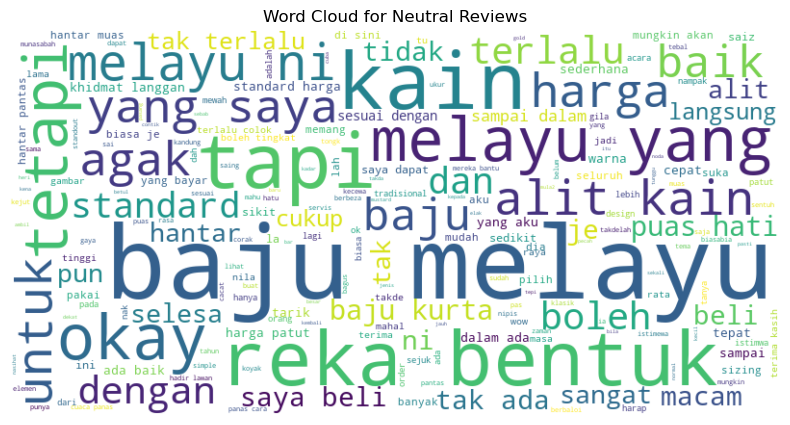

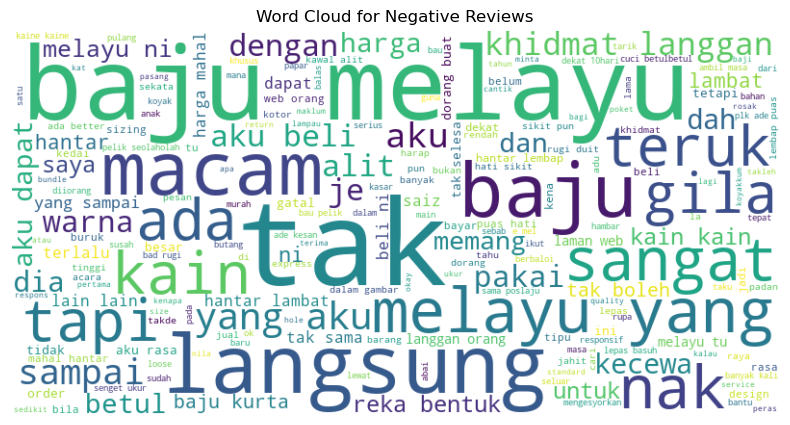

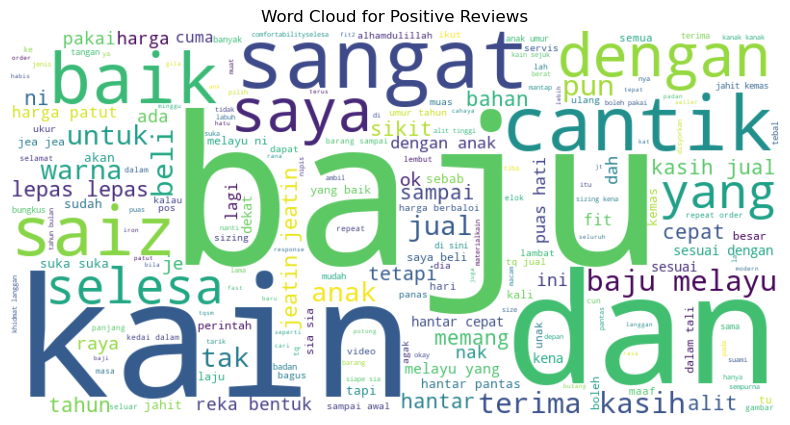

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data' with columns 'Translated_Review_MS' and 'Sentiment_MS'
# If your DataFrame or column names are different, adjust accordingly

# Function to generate and display word cloud for a specific sentiment category
def generate_word_cloud(sentiment_category):
    # Filter the DataFrame for the specified sentiment category
    filtered_data = data[data['Sentiment_MS'] == sentiment_category]

    # Concatenate all reviews in the filtered DataFrame
    text = ' '.join(filtered_data['Translated_Review_MS'])

    # Generate WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment_category} Reviews')
    plt.show()

# Generate word clouds for each sentiment category
sentiment_categories = data['Sentiment_MS'].unique()
for category in sentiment_categories:
    generate_word_cloud(category)


### 2.8 Save as .csv file

In [30]:
# Assuming 'data' is your DataFrame with columns 'Translated_Review_MS' and 'Sentiment_MS'
# If you have a different DataFrame or column names, adjust accordingly

# Create a DataFrame with only the desired columns
selected_columns = ['Translated_Review_MS', 'Sentiment_MS']
selected_data = data[selected_columns]

# Save the selected columns to a CSV file
selected_data.to_csv('Translated_Review_MS_with_sentiment_MS.csv', index=False)

# Display a message indicating that the CSV file has been created
print("Selected columns saved to Translated_Review_MS_with_sentiment_MS.csv")


Selected columns saved to Translated_Review_MS_with_sentiment_MS.csv


In [31]:
data_final = pd.read_csv('Translated_Review_MS_with_sentiment_MS.csv', encoding='latin1')
data_final.head()

,Translated_Review_MS,Sentiment_MS
0,baju kurta sampai dalam ada baik tapi tak ada ...,Neutral
1,sizing tak tepat langsung aku rasa macam baju ...,Negative
2,baju kurta saya dah koyakkum pakai memang tak ...,Negative
3,hantar laju kain cantik terima kasih jual masi...,Positive
4,baju selamat darat kain cantik dan sedap di pa...,Positive


In [32]:
data_final = data_final.astype({'Sentiment_MS' : 'category'})
data_final = data_final.astype({'Translated_Review_MS' : 'string'})
data_final.dtypes


Translated_Review_MS    string[python]
Sentiment_MS                  category
dtype: object

# 3.0 Feature Extration

### 3.1 TF-IDF

In [33]:
# PROCESS TF-IDF (Feature Extraction) - Count Vector
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data_final['Translated_Review_MS'].astype('U'))

tf = TfidfVectorizer()
text_tf = tf.fit_transform(data_final['Translated_Review_MS'].astype('U'))
print(text_tf)

  (0, 961)	0.5029730994543845
  (0, 1104)	0.19125520315789246
  (0, 985)	0.1816835247463813
  (0, 1005)	0.2553686143476531
  (0, 99)	0.25803102745259654
  (0, 35)	0.5133794712321927
  (0, 259)	0.2943307208222907
  (0, 839)	0.24201354835384142
  (0, 510)	0.34930080416120485
  (0, 103)	0.12192949162132485
  (1, 802)	0.3984429766168494
  (1, 1108)	0.41209875350571284
  (1, 874)	0.42881207366663715
  (1, 565)	0.23963649040050772
  (1, 791)	0.31615756525230143
  (1, 54)	0.19729482008828297
  (1, 532)	0.23963649040050772
  (1, 1019)	0.33498086745476546
  (1, 944)	0.2946103479873288
  (1, 985)	0.15489514067864216
  (1, 103)	0.10395155963604565
  (2, 59)	0.24953471077407413
  (2, 615)	0.3098542524577515
  (2, 696)	0.305581789832558
  (2, 503)	0.5522289303817013
  :	:
  (447, 103)	0.11044978839102286
  (448, 561)	0.5049101792056289
  (448, 670)	0.4503823497291309
  (448, 612)	0.15449991049040412
  (448, 693)	0.37830047999092103
  (448, 131)	0.20458209227330512
  (448, 352)	0.20545135005898726
 

### 4.0 Splitting Data

In [34]:
# Splitting the Translated_Review_MS_with_sentiment_MS.csv into train_data and test_data
# Where 80% for training purpose and 20% for testing purpose

train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

# Display the number of samples in each set
print("Number of samples in training set:", len(train_data))
print("Number of samples in test set:", len(test_data))

Number of samples in training set: 360
Number of samples in test set: 90


In [35]:
# Assume 'Translated_Review_MS' is your feature column and 'Sentiment_MS' is your target variable
x_train = train_data['Translated_Review_MS']
y_train = train_data['Sentiment_MS']
x_test = test_data['Translated_Review_MS']
y_test = test_data['Sentiment_MS']


In [36]:
train_data.head()

,Translated_Review_MS,Sentiment_MS
0,baju kurta sampai dalam ada baik tapi tak ada ...,Neutral
1,sizing tak tepat langsung aku rasa macam baju ...,Negative
2,baju kurta saya dah koyakkum pakai memang tak ...,Negative
3,hantar laju kain cantik terima kasih jual masi...,Positive
4,baju selamat darat kain cantik dan sedap di pa...,Positive


In [37]:
test_data.head()

,Translated_Review_MS,Sentiment_MS
0,saiz produk sempurna hanya tidak alit dan harg...,Positive
1,baju selamat sampai seluar fit dengan anak cum...,Positive
2,barang sampai dalam ada baik dengan bungkus ya...,Positive
3,kain dan color semua cantik jenis kain tak mud...,Positive
4,kain cun saiz ikut saiz badan biasa kalau nak ...,Positive


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
import pandas as pd
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

# Tokenize the text data
tokenizer = Tokenizer(num_words=10000) 
tokenizer.fit_on_texts(x_train)

# Convert text to sequences
x_train_sequences = tokenizer.texts_to_sequences(x_train)
x_test_sequences = tokenizer.texts_to_sequences(x_test)

# Pad sequences to have the same length
maxlen = 50
x_train_padded = pad_sequences(x_train_sequences, maxlen=maxlen, padding='post')
x_test_padded = pad_sequences(x_test_sequences, maxlen=maxlen, padding='post')

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert labels to one-hot encoding
num_classes = len(label_encoder.classes_)
y_train_one_hot = to_categorical(y_train_encoded, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test_encoded, num_classes=num_classes)

# Assuming 'your_data.csv' is your dataset
data = pd.read_csv('Translated_Review_MS_with_sentiment_MS.csv')

# Assuming 'Review' column contains text data
text_data = data['Translated_Review_MS']

# Convert text data to numerical representation using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
text_matrix = tfidf_vectorizer.fit_transform(text_data)

# Assuming 'Rating' is your target variable
y = data['Sentiment_MS']

# Handling class imbalance with SMOTE
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train_padded, y_train_encoded)


# 5.0 Model Training, Testing and Evaluation 

### 5.1 Support Vector Machinem (SVM) - RBF 

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000)  # You can adjust max_features based on your dataset size

# Fit and transform the training data
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)

# Transform the test data using the same vectorizer
x_test_tfidf = tfidf_vectorizer.transform(x_test)

# Create an SVM model with RBF kernel
svm_rbf = SVC(kernel='rbf')

# Train the model
svm_rbf.fit(x_train_tfidf, y_train)

# Make predictions on the test set
predicted = svm_rbf.predict(x_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, predicted)
print('The resulting accuracy using RBF is {:.2f}%'.format(100 * accuracy))


The resulting accuracy using RBF is 76.67%


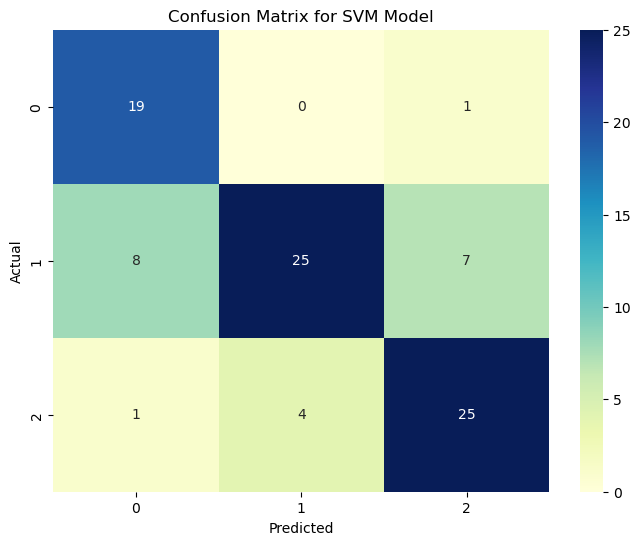

SVM Model Metrics:
Accuracy: 0.7667
Precision: 0.7667
Recall: 0.7667
F1 Score: 0.7667


In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix for SVM
cm_svm = confusion_matrix(y_test, predicted)

# Plot the confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM Model')
plt.show()

# Calculate performance metrics for SVM
accuracy_svm = accuracy_score(y_test, predicted)
precision_svm = precision_score(y_test, predicted, average='micro')
recall_svm = recall_score(y_test, predicted, average='micro')
f1_svm = f1_score(y_test, predicted, average='micro')

print('SVM Model Metrics:')
print('Accuracy: {:.4f}'.format(accuracy_svm))
print('Precision: {:.4f}'.format(precision_svm))
print('Recall: {:.4f}'.format(recall_svm))
print('F1 Score: {:.4f}'.format(f1_svm))


### 5.2 Simple Neural Network (SNN)

In [49]:
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, Flatten, Dense
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Tokenize the text data
tokenizer = Tokenizer(num_words=10000)  # Adjust the vocabulary size as needed
tokenizer.fit_on_texts(x_train)

# Convert text to sequences
x_train_sequences = tokenizer.texts_to_sequences(x_train)
x_test_sequences = tokenizer.texts_to_sequences(x_test)

# Pad sequences to have the same length
maxlen = 50  # Adjust the sequence length as needed
x_train_padded = pad_sequences(x_train_sequences, maxlen=maxlen, padding='post')
x_test_padded = pad_sequences(x_test_sequences, maxlen=maxlen, padding='post')

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert labels to one-hot encoding
num_classes = len(label_encoder.classes_)
y_train_one_hot = to_categorical(y_train_encoded, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test_encoded, num_classes=num_classes)

# Build a Simple Neural Network (SNN) model
snn_model = Sequential()
snn_model.add(Embedding(input_dim=10000, output_dim=100, input_length=maxlen))
snn_model.add(Flatten())
snn_model.add(Dense(128, activation='relu'))
snn_model.add(Dense(num_classes, activation='softmax'))

# Compile the model
snn_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the SNN model
snn_model.fit(x_train_padded, y_train_one_hot, epochs=10, batch_size=128, validation_split=0.2)

# Evaluate the SNN model on the test set
score = snn_model.evaluate(x_test_padded, y_test_one_hot, verbose=1)
print(f"SNN Model Test Loss: {score[0]}, Accuracy: {score[1]}")

# Predictions on the test set
y_pred_prob_snn = snn_model.predict(x_test_padded)
y_pred_snn = np.argmax(y_pred_prob_snn, axis=1)

# Decode the encoded labels
y_test_labels = label_encoder.inverse_transform(y_test_encoded)
y_pred_labels_snn = label_encoder.inverse_transform(y_pred_snn)

# Calculate accuracy
accuracy_snn = accuracy_score(y_test_labels, y_pred_labels_snn)
print(f"SNN Model Accuracy on the test set: {accuracy_snn * 100:.2f}%")

Epoch 1/10
3/3 [==============================] - 1s 149ms/step - loss: 1.0709 - accuracy: 0.4549 - val_loss: 1.2928 - val_accuracy: 0.3056
Epoch 2/10
3/3 [==============================] - 0s 64ms/step - loss: 1.0332 - accuracy: 0.4896 - val_loss: 1.1421 - val_accuracy: 0.3056
Epoch 3/10
3/3 [==============================] - 0s 59ms/step - loss: 0.9524 - accuracy: 0.5174 - val_loss: 1.2072 - val_accuracy: 0.2917
Epoch 4/10
3/3 [==============================] - 0s 56ms/step - loss: 0.8919 - accuracy: 0.5799 - val_loss: 1.1414 - val_accuracy: 0.3056
Epoch 5/10
3/3 [==============================] - 0s 58ms/step - loss: 0.8260 - accuracy: 0.5694 - val_loss: 1.0985 - val_accuracy: 0.3194
Epoch 6/10
3/3 [==============================] - 0s 56ms/step - loss: 0.7501 - accuracy: 0.7639 - val_loss: 1.0981 - val_accuracy: 0.3333
Epoch 7/10
3/3 [==============================] - 0s 59ms/step - loss: 0.6732 - accuracy: 0.8646 - val_loss: 0.9939 - val_accuracy: 0.4861
Epoch 8/10
3/3 [==========

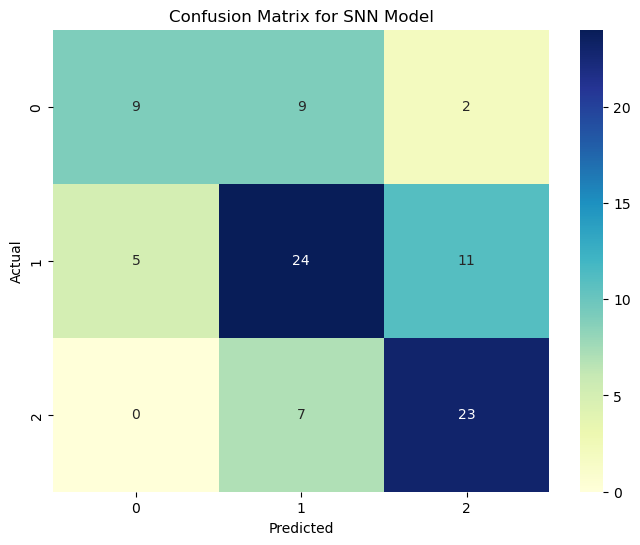

SNN Model Metrics:
Precision: 0.6222
Recall: 0.6222
F1 Score: 0.6222


In [50]:
# Calculate the confusion matrix for SNN
cm_snn = confusion_matrix(y_test_labels, y_pred_labels_snn)

# Plot the confusion matrix for SNN
plt.figure(figsize=(8, 6))
sns.heatmap(cm_snn, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SNN Model')
plt.show()

# Calculate performance metrics for SNN
precision_snn = precision_score(y_test_labels, y_pred_labels_snn, average='micro')
recall_snn = recall_score(y_test_labels, y_pred_labels_snn, average='micro')
f1_snn = f1_score(y_test_labels, y_pred_labels_snn, average='micro')

print('SNN Model Metrics:')
print('Precision: {:.4f}'.format(precision_snn))
print('Recall: {:.4f}'.format(recall_snn))
print('F1 Score: {:.4f}'.format(f1_snn))

### 5.3 Convolutional Neural Network (CNN)

In [51]:
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Tokenize the text data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(x_train)

# Convert text to sequences
x_train_sequences = tokenizer.texts_to_sequences(x_train)
x_test_sequences = tokenizer.texts_to_sequences(x_test)

# Pad sequences to have the same length
maxlen = 50
x_train_padded = pad_sequences(x_train_sequences, maxlen=maxlen, padding='post')
x_test_padded = pad_sequences(x_test_sequences, maxlen=maxlen, padding='post')

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert labels to one-hot encoding
num_classes = len(label_encoder.classes_)
y_train_one_hot = to_categorical(y_train_encoded, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test_encoded, num_classes=num_classes)

# Build a Convolutional Neural Network (CNN) model
cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=10000, output_dim=100, input_length=maxlen))
cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(num_classes, activation='softmax'))

# Compile the model
cnn_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn_model.fit(x_train_padded, y_train_one_hot, epochs=10, batch_size=128, validation_split=0.2)

# Evaluate the CNN model on the test set
score = cnn_model.evaluate(x_test_padded, y_test_one_hot, verbose=1)
print(f"CNN Model Test Loss: {score[0]}, Accuracy: {score[1]}")

# Make predictions on the test set
y_pred_prob_cnn = cnn_model.predict(x_test_padded)
y_pred_cnn = np.argmax(y_pred_prob_cnn, axis=1)

# Decode the encoded labels
y_test_labels = label_encoder.inverse_transform(y_test_encoded)
y_pred_labels_cnn = label_encoder.inverse_transform(y_pred_cnn)

# Calculate accuracy
accuracy_cnn = accuracy_score(y_test_labels, y_pred_labels_cnn)
print(f"CNN Model Accuracy on the test set: {accuracy_cnn * 100:.2f}%")

Epoch 1/10
3/3 [==============================] - 1s 130ms/step - loss: 1.0975 - accuracy: 0.3785 - val_loss: 1.0791 - val_accuracy: 0.3056
Epoch 2/10
3/3 [==============================] - 0s 58ms/step - loss: 1.0351 - accuracy: 0.4861 - val_loss: 1.0800 - val_accuracy: 0.3056
Epoch 3/10
3/3 [==============================] - 0s 55ms/step - loss: 0.9956 - accuracy: 0.4861 - val_loss: 1.0961 - val_accuracy: 0.3056
Epoch 4/10
3/3 [==============================] - 0s 58ms/step - loss: 0.9654 - accuracy: 0.4861 - val_loss: 1.0906 - val_accuracy: 0.3056
Epoch 5/10
3/3 [==============================] - 0s 57ms/step - loss: 0.9286 - accuracy: 0.4861 - val_loss: 1.0489 - val_accuracy: 0.3056
Epoch 6/10
3/3 [==============================] - 0s 57ms/step - loss: 0.8839 - accuracy: 0.4861 - val_loss: 0.9950 - val_accuracy: 0.3194
Epoch 7/10
3/3 [==============================] - 0s 58ms/step - loss: 0.8313 - accuracy: 0.5000 - val_loss: 0.9387 - val_accuracy: 0.3333
Epoch 8/10
3/3 [==========

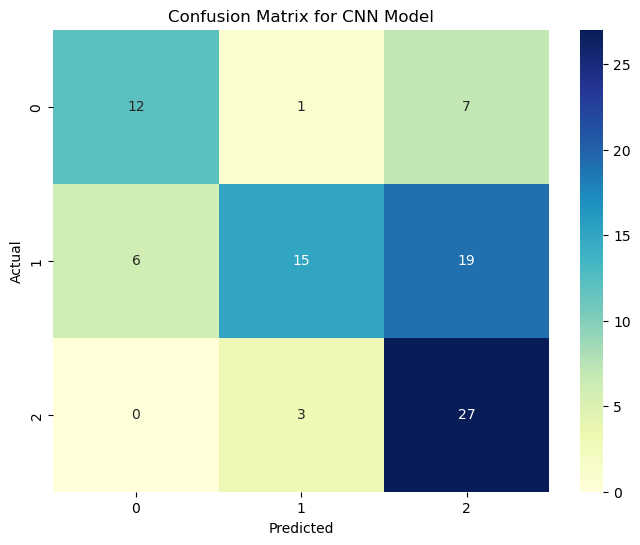

CNN Model Metrics:
Precision: 0.6000
Recall: 0.6000
F1 Score: 0.6000


In [52]:
# Calculate the confusion matrix for CNN
cm_cnn = confusion_matrix(y_test_labels, y_pred_labels_cnn)

# Plot the confusion matrix for CNN
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for CNN Model')
plt.show()

# Calculate performance metrics for CNN
precision_cnn = precision_score(y_test_labels, y_pred_labels_cnn, average='micro')
recall_cnn = recall_score(y_test_labels, y_pred_labels_cnn, average='micro')
f1_cnn = f1_score(y_test_labels, y_pred_labels_cnn, average='micro')

print('CNN Model Metrics:')
print('Precision: {:.4f}'.format(precision_cnn))
print('Recall: {:.4f}'.format(recall_cnn))
print('F1 Score: {:.4f}'.format(f1_cnn))

### 5.4 Long Short-Term Memory (LSTM)

In [53]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 50  # Adjust the sequence length as needed

# Tokenize the text data
tokenizer = Tokenizer(num_words=10000) 
tokenizer.fit_on_texts(x_train)

# Convert text to sequences
x_train_sequences = tokenizer.texts_to_sequences(x_train)
x_test_sequences = tokenizer.texts_to_sequences(x_test)

# Pad sequences to have the same length
x_train_padded = pad_sequences(x_train_sequences, maxlen=maxlen, padding='post')
x_test_padded = pad_sequences(x_test_sequences, maxlen=maxlen, padding='post')

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert labels to one-hot encoding
num_classes = len(label_encoder.classes_)
y_train_one_hot = to_categorical(y_train_encoded, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test_encoded, num_classes=num_classes)

# Build an LSTM model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=10000, output_dim=100, input_length=maxlen))
lstm_model.add(LSTM(128))
lstm_model.add(Dense(num_classes, activation='softmax'))

# Compile the model
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the LSTM model
lstm_model.fit(x_train_padded, y_train_one_hot, epochs=6, batch_size=128, validation_split=0.2)

# Evaluate the LSTM model on the test set
score = lstm_model.evaluate(x_test_padded, y_test_one_hot, verbose=1)
print(f"LSTM Model Test Loss: {score[0]}, Accuracy: {score[1]}")

# Predictions on the test set
y_pred_prob_lstm = lstm_model.predict(x_test_padded)
y_pred_lstm = np.argmax(y_pred_prob_lstm, axis=1)

# Decode the encoded labels
y_test_labels = label_encoder.inverse_transform(y_test_encoded)
y_pred_labels_lstm = label_encoder.inverse_transform(y_pred_lstm)

# Calculate accuracy
accuracy_lstm = accuracy_score(y_test_labels, y_pred_labels_lstm)
print(f"LSTM Model Accuracy on the test set: {accuracy_lstm * 100:.2f}%")


Epoch 1/6
3/3 [==============================] - 3s 321ms/step - loss: 1.0878 - accuracy: 0.4792 - val_loss: 1.0963 - val_accuracy: 0.3056
Epoch 2/6
3/3 [==============================] - 0s 149ms/step - loss: 1.0558 - accuracy: 0.4861 - val_loss: 1.1458 - val_accuracy: 0.3056
Epoch 3/6
3/3 [==============================] - 0s 122ms/step - loss: 1.0646 - accuracy: 0.4861 - val_loss: 1.1478 - val_accuracy: 0.3056
Epoch 4/6
3/3 [==============================] - 0s 104ms/step - loss: 1.0535 - accuracy: 0.4861 - val_loss: 1.1380 - val_accuracy: 0.3056
Epoch 5/6
3/3 [==============================] - 0s 105ms/step - loss: 1.0538 - accuracy: 0.4861 - val_loss: 1.1535 - val_accuracy: 0.3056
Epoch 6/6
3/3 [==============================] - 0s 14ms/step - loss: 1.1012 - accuracy: 0.3333
LSTM Model Test Loss: 1.1011875867843628, Accuracy: 0.3333333432674408
3/3 [==============================] - 0s 13ms/step
LSTM Model Accuracy on the test set: 33.33%


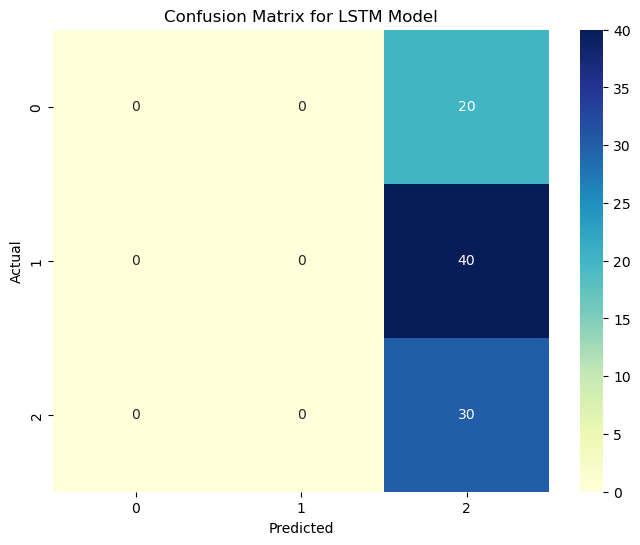

LSTM Model Metrics:
Precision: 0.3333
Recall: 0.3333
F1 Score: 0.3333


In [54]:
# Calculate the confusion matrix for LSTM
cm_lstm = confusion_matrix(y_test_labels, y_pred_labels_lstm)

# Plot the confusion matrix for LSTM
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for LSTM Model')
plt.show()

# Calculate performance metrics for LSTM
precision_lstm = precision_score(y_test_labels, y_pred_labels_lstm, average='micro')
recall_lstm = recall_score(y_test_labels, y_pred_labels_lstm, average='micro')
f1_lstm = f1_score(y_test_labels, y_pred_labels_lstm, average='micro')

print('LSTM Model Metrics:')
print('Precision: {:.4f}'.format(precision_lstm))
print('Recall: {:.4f}'.format(recall_lstm))
print('F1 Score: {:.4f}'.format(f1_lstm))

### 5.5 Logistic Regression Model

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000)  # You can adjust max_features based on your dataset size

# Fit and transform the training data
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)

# Transform the test data using the same vectorizer
x_test_tfidf = tfidf_vectorizer.transform(x_test)

# Create a Logistic Regression model
logistic_regression_model = LogisticRegression()

# Train the model
logistic_regression_model.fit(x_train_tfidf, y_train)

# Make predictions on the test set
y_pred = logistic_regression_model.predict(x_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(100 * accuracy))

Accuracy: 77.78%


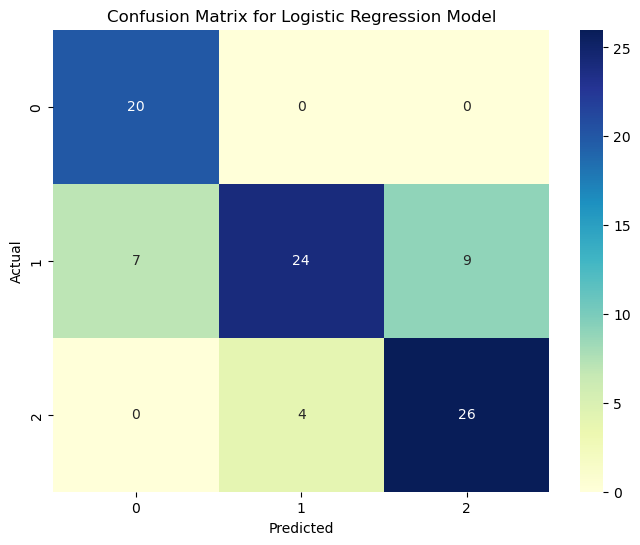

Logistic Regression Model Metrics:
Precision: 0.7778
Recall: 0.7778
F1 Score: 0.7778


In [56]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

cm_logistic_regression = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logistic_regression, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

# Calculate performance metrics for Logistic Regression
precision_logistic_regression = precision_score(y_test, y_pred, average='micro')
recall_logistic_regression = recall_score(y_test, y_pred, average='micro')
f1_logistic_regression = f1_score(y_test, y_pred, average='micro')

print('Logistic Regression Model Metrics:')
print('Precision: {:.4f}'.format(precision_logistic_regression))
print('Recall: {:.4f}'.format(recall_logistic_regression))
print('F1 Score: {:.4f}'.format(f1_logistic_regression))


### 5.6 Naive Bayes 

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'X_train', 'X_test', 'y_train', and 'y_test' are your preprocessed training and testing sets
# Replace 'labels' with your actual target variable name
# X_train and X_test should be pandas Series containing your text data
# y_train and y_test should be the corresponding target variable

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000)  # You can adjust max_features based on your dataset size

# Fit and transform the training data
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)

# Transform the test data using the same vectorizer
x_test_tfidf = tfidf_vectorizer.transform(x_test)

# Create a Multinomial Naive Bayes model
naive_bayes = MultinomialNB()

# Train the model
naive_bayes.fit(x_train_tfidf, y_train)

# Make predictions on the test set
y_pred = naive_bayes.predict(x_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('The resulting accuracy for Naive Bayes is {:.2f}%'.format(100 * accuracy))

The resulting accuracy for Naive Bayes is 65.56%


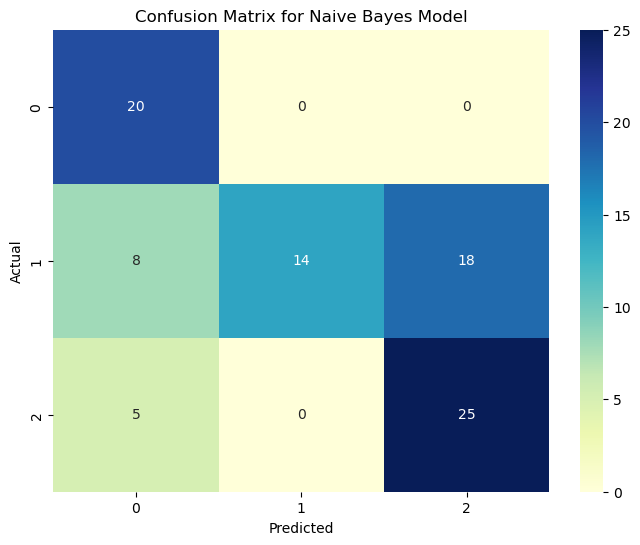

Naive Bayes Model Metrics:
Precision: 0.6556
Recall: 0.6556
F1 Score: 0.6556


In [58]:
# Calculate the confusion matrix for Naive Bayes
cm_naive_bayes = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix for Naive Bayes
plt.figure(figsize=(8, 6))
sns.heatmap(cm_naive_bayes, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes Model')
plt.show()

# Calculate performance metrics for Naive Bayes
precision_naive_bayes = precision_score(y_test, y_pred, average='micro')
recall_naive_bayes = recall_score(y_test, y_pred, average='micro')
f1_naive_bayes = f1_score(y_test, y_pred, average='micro')

print('Naive Bayes Model Metrics:')
print('Precision: {:.4f}'.format(precision_naive_bayes))
print('Recall: {:.4f}'.format(recall_naive_bayes))
print('F1 Score: {:.4f}'.format(f1_naive_bayes))

### 5.7 Random Forest

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000)  # You can adjust max_features based on your dataset size

# Fit and transform the training data
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)

# Transform the test data using the same vectorizer
x_test_tfidf = tfidf_vectorizer.transform(x_test)

# Create a Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(x_train_tfidf, y_train)

# Make predictions on the test set
y_pred = random_forest.predict(x_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('The resulting accuracy for Random Forest Classifier is {:.2f}%'.format(100 * accuracy))

The resulting accuracy for Random Forest Classifier is 75.56%


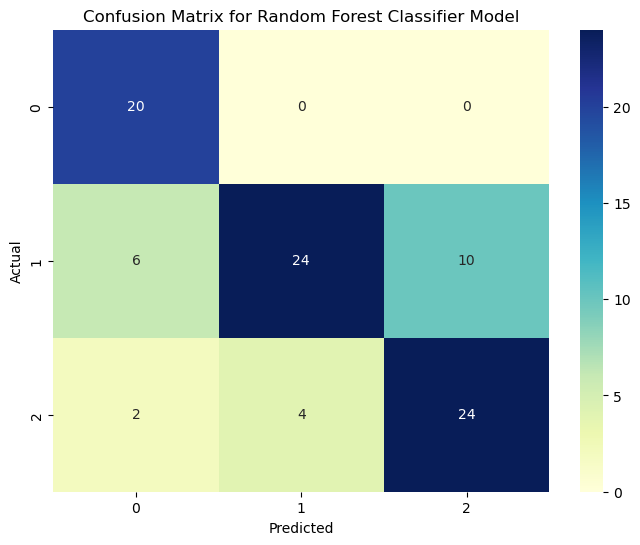

Random Forest Model Metrics:
Precision: 0.7556
Recall: 0.7556
F1 Score: 0.7556


In [60]:
# Calculate the confusion matrix for Random Forest
cm_random_forest = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(cm_random_forest, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier Model')
plt.show()

# Calculate performance metrics for Random Forest
precision_random_forest = precision_score(y_test, y_pred, average='micro')
recall_random_forest = recall_score(y_test, y_pred, average='micro')
f1_random_forest = f1_score(y_test, y_pred, average='micro')

print('Random Forest Model Metrics:')
print('Precision: {:.4f}'.format(precision_random_forest))
print('Recall: {:.4f}'.format(recall_random_forest))
print('F1 Score: {:.4f}'.format(f1_random_forest))

### 5.8 K-Nearest Neighbours (KNN)

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000)  # You can adjust max_features based on your dataset size

# Fit and transform the training data
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)

# Transform the test data using the same vectorizer
x_test_tfidf = tfidf_vectorizer.transform(x_test)

# Create a KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(x_train_tfidf, y_train)

# Make predictions on the test set
y_pred = knn.predict(x_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('The resulting accuracy for KNN is {:.2f}%'.format(100 * accuracy))

The resulting accuracy for KNN is 74.44%


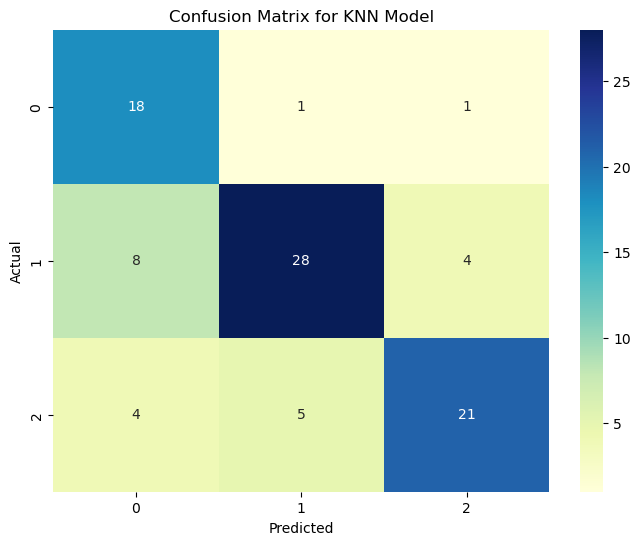

KNN Model Metrics:
Precision: 0.7444
Recall: 0.7444
F1 Score: 0.7444


In [62]:
# Calculate the confusion matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix for KNN
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN Model')
plt.show()

# Calculate performance metrics for KNN
precision_knn = precision_score(y_test, y_pred, average='micro')
recall_knn = recall_score(y_test, y_pred, average='micro')
f1_knn = f1_score(y_test, y_pred, average='micro')

print('KNN Model Metrics:')
print('Precision: {:.4f}'.format(precision_knn))
print('Recall: {:.4f}'.format(recall_knn))
print('F1 Score: {:.4f}'.format(f1_knn))


### 5.9 Decision Tree

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000)  # You can adjust max_features based on your dataset size

# Fit and transform the training data
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)

# Transform the test data using the same vectorizer
x_test_tfidf = tfidf_vectorizer.transform(x_test)

# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Train the model
dt_classifier.fit(x_train_tfidf, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(x_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('The resulting accuracy using Decision Tree Classifier is {:.2f}%'.format(100 * accuracy))

The resulting accuracy using Decision Tree Classifier is 61.11%


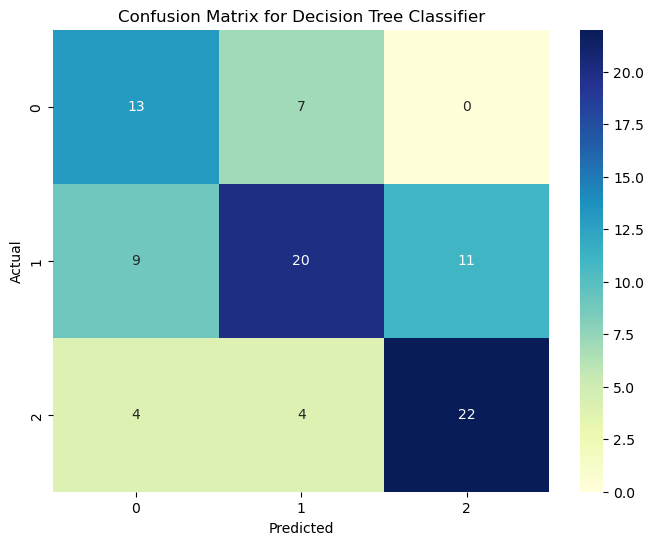

Decision Tree Classifier Metrics:
Precision: 0.6111
Recall: 0.6111
F1 Score: 0.6111


In [64]:
# Calculate the confusion matrix
cm_dt = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

# Calculate performance metrics
precision_dt = precision_score(y_test, y_pred, average='micro')
recall_dt = recall_score(y_test, y_pred, average='micro')
f1_dt = f1_score(y_test, y_pred, average='micro')

print('Decision Tree Classifier Metrics:')
print('Precision: {:.4f}'.format(precision_dt))
print('Recall: {:.4f}'.format(recall_dt))
print('F1 Score: {:.4f}'.format(f1_dt))

### 5.10 VADER Sentiment

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis on the training set
train_sentiments = [sid.polarity_scores(text)['compound'] for text in x_train]

# Perform sentiment analysis on the test set
test_sentiments = [sid.polarity_scores(text)['compound'] for text in x_test]

# Convert sentiment scores to labels (Positive, Negative, Neutral)
train_pred_labels = ['Positive' if score >= 0.05 else 'Negative' if score <= -0.05 else 'Neutral' for score in train_sentiments]
test_pred_labels = ['Positive' if score >= 0.05 else 'Negative' if score <= -0.05 else 'Neutral' for score in test_sentiments]

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, test_pred_labels)
print('The resulting accuracy using VADER Sentiment is {:.2f}%'.format(100 * accuracy_test))

The resulting accuracy using VADER Sentiment is 43.33%


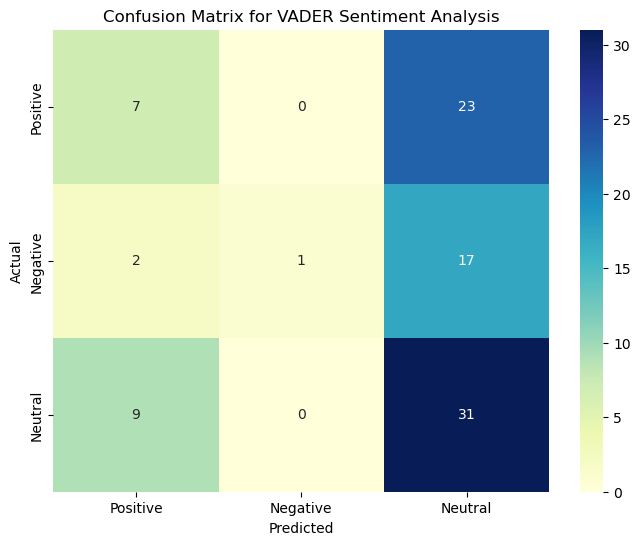

VADER Model Metrics:
Precision: 0.5459
Recall: 0.4333
F1 Score: 0.3666


In [66]:
from sklearn.metrics import classification_report

# Calculate confusion matrix for the test set
cm_test = confusion_matrix(y_test, test_pred_labels, labels=['Positive', 'Negative', 'Neutral'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap="YlGnBu", xticklabels=['Positive', 'Negative', 'Neutral'], yticklabels=['Positive', 'Negative', 'Neutral'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for VADER Sentiment Analysis')
plt.show()

# Calculate classification report
classification_rep = classification_report(y_test, test_pred_labels, labels=['Positive', 'Negative', 'Neutral'], digits=4)

# Extract precision, recall, and F1 score from the classification report
precision_vader, recall_vader, f1_vader, _ = map(float, classification_rep.split()[-4:])

# Display precision, recall, and F1 score
print('VADER Model Metrics:')
print('Precision: {:.4f}'.format(precision_vader))
print('Recall: {:.4f}'.format(recall_vader))
print('F1 Score: {:.4f}'.format(f1_vader))

### 5.11 BERT Model

In [67]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Encode labels to numerical format
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert labels to Long type
y_train = torch.tensor(y_train_encoded, dtype=torch.long)
y_test = torch.tensor(y_test_encoded, dtype=torch.long)

# Define the BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=3)  # Assuming 3 classes

# Tokenize and encode the training set
train_encodings = tokenizer(list(x_train), truncation=True, padding=True, return_tensors='pt')
y_train = torch.tensor(y_train_encoded, dtype=torch.long)

# Tokenize and encode the test set
test_encodings = tokenizer(list(x_test), truncation=True, padding=True, return_tensors='pt')
y_test = torch.tensor(y_test_encoded, dtype=torch.long)

# Create DataLoader for efficient batch processing
train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], y_train)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

test_dataset = TensorDataset(test_encodings['input_ids'], test_encodings['attention_mask'], y_test)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Define optimizer and scheduler
optimizer = AdamW(model.parameters(), lr=5e-5)
total_steps = len(train_loader) * 2  # 2 epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

# Training loop
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(2):  # Change the number of epochs as needed
    model.train()
    for batch in train_loader:
        inputs = {'input_ids': batch[0].to(device),
                  'attention_mask': batch[1].to(device),
                  'labels': batch[2].to(device)}
        
        optimizer.zero_grad()
        outputs = model(**inputs)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        scheduler.step()

# Evaluation
model.eval()
predictions = []
true_labels = []

with torch.no_grad():
    for batch in test_loader:
        inputs = {'input_ids': batch[0].to(device),
                  'attention_mask': batch[1].to(device),
                  'labels': batch[2].to(device)}
        
        outputs = model(**inputs)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)
        
        predictions.extend(preds.cpu().numpy())
        true_labels.extend(batch[2].cpu().numpy())

# Calculate accuracy
accuracy = accuracy_score(true_labels, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Wei Ying\anaconda3\Lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Accuracy: 61.11%


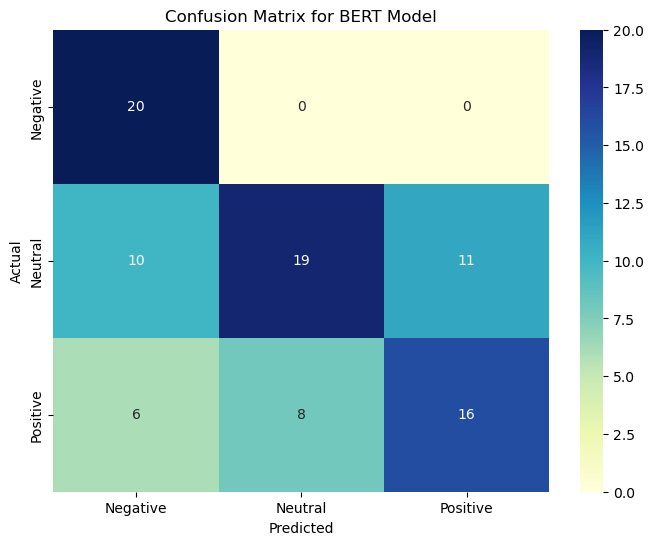

BERT Model Metrics:
Precision: 0.6111
Recall: 0.6111
F1 Score: 0.6111


In [68]:
# Calculate confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for BERT Model')
plt.show()

# Calculate performance metrics for BERT
precision_bert = precision_score(true_labels, predictions, average='micro')
recall_bert = recall_score(true_labels, predictions, average='micro')
f1_bert = f1_score(true_labels, predictions, average='micro')

print('BERT Model Metrics:')
print('Precision: {:.4f}'.format(precision_bert))
print('Recall: {:.4f}'.format(recall_bert))
print('F1 Score: {:.4f}'.format(f1_bert))

# 6.0 Sentiment Analysis

#### After model training, testing and evaluation,  an appropriate sentiment analysis model that can effectively handle the OOV nature of Malaysia Rojak language is Logistic Regression Model with the highest accuracy of 77.78%

In [71]:

import joblib
# Save the trained model to a .pkl file
joblib.dump(logistic_regression_model, 'logistic_regression_model.pkl')


['logistic_regression_model.pkl']

In [83]:
import tkinter as tk
from tkinter import ttk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from googletrans import Translator
import joblib

# Load the pre-trained Logistic Regression model
logistic_regression_model = joblib.load('logistic_regression_model.pkl')  # Provide the correct path

# Initialize the translator object
translator = Translator()

# Assuming 'x_train' is your training data
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)

# Function to perform sentiment analysis
def analyze_sentiment():
    review = text_area.get("1.0", "end-1c")

    if review:
        # Translate the review to Malay
        translation = translator.translate(review, dest='ms')
        translated_review = translation.text

        # Vectorize the translated review
        review_vectorized = tfidf_vectorizer.transform([translated_review])

        # Predict sentiment
        sentiment = logistic_regression_model.predict(review_vectorized)[0]

        # Display the result with color-coded sentiment
        if sentiment == 'Positive':
            result_label.config(text=f"It is a {sentiment} review.", foreground="#4CAF50", font=('Helvetica', 14, 'bold'))
        elif sentiment == 'Neutral':
            result_label.config(text=f"It is a {sentiment} review.", foreground="#808080", font=('Helvetica', 14, 'bold'))
        else:
            result_label.config(text=f"It is a {sentiment} review.", foreground="#FF0000", font=('Helvetica', 14, 'bold'))
    else:
        result_label.config(text="Please enter a review.", foreground="#FF0000", font=('Helvetica', 12, 'italic'))

# Create the main application window
app = tk.Tk()
app.title("Sentiment Analysis")
app.geometry("700x400")  # Set the increased size of the window

# Set the background color to light blue
app.configure(bg='#d8e2eb')

# Create and place widgets with some styling
label = ttk.Label(app, text="Enter Review:", font=('Helvetica', 11, 'bold'), background='#d8e2eb')
label.grid(row=0, column=0, padx=(52, 10), pady=(55,0))

text_area = tk.Text(app, height=5, width=60, font=('Helvetica', 11))
text_area.grid(row=0, column=1, padx=5, pady=(55,0))

analyze_button = ttk.Button(app, text="Analyze", command=analyze_sentiment, style='TButton')
analyze_button.grid(row=1, column=0, columnspan=2, padx=(72, 10),pady=(20,10))

result_label = ttk.Label(app, text="", font=('Helvetica', 11), background='#d8e2eb')
result_label.grid(row=2, column=0, columnspan=2, padx=(73,10),pady=10)

# Add some styling to the button
style = ttk.Style()
style.configure('TButton', font=('Helvetica', 11, 'bold'))

# Run the application
app.mainloop()

In [84]:
# Example of Reviews to be tested

# Positive Review: I like this baju melayu. Customer service sngt baik, dan delivery pun cepat. tq
# Neutral Review: baju ni okay jer dipakai, kualiti match dgn harga
# Negative Review 1: Kain baju ni teruk ... penghantaran lambat, tak kan repeat order lagi ...